# Fine Tuning Decision Tree and Random Forests

In this notebook, we will find the ideal depth of the decision trees and further, tune the other parameters of random forests.


## 1.1 Tune Decision Trees

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, accuracy_score

In [ ]:
X_bal = pd.read_csv('xtrain.csv', sep=',')
y_bal = pd.read_csv('ytrain.csv', sep=',')

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.33, random_state=42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score

for i in range(1,20):
    decision = DecisionTreeClassifier(criterion='entropy',max_depth=i, min_samples_split=20, random_state=42)
    decision.fit(X_train,y_train)
    y_pred = decision.predict(X_test)
    
    print(f'\n*****decision tree depth level  {i}*******')
    print('balanced accuracy: ', round(balanced_accuracy_score(y_test, y_pred), 2))
    print('f1_score: ', round(f1_score(y_test, y_pred), 2))
    print('precision: ', round(precision_score(y_test, y_pred), 2))
    print('recall: ', round(recall_score(y_test, y_pred), 2))


*****decision tree depth level  1*******
balanced accuracy:  0.66
f1_score:  0.73
precision:  0.61
recall:  0.91

*****decision tree depth level  2*******
balanced accuracy:  0.66
f1_score:  0.73
precision:  0.61
recall:  0.91

*****decision tree depth level  3*******
balanced accuracy:  0.73
f1_score:  0.73
precision:  0.74
recall:  0.72

*****decision tree depth level  4*******
balanced accuracy:  0.73
f1_score:  0.73
precision:  0.74
recall:  0.72

*****decision tree depth level  5*******
balanced accuracy:  0.79
f1_score:  0.75
precision:  0.93
recall:  0.64

*****decision tree depth level  6*******
balanced accuracy:  0.82
f1_score:  0.84
precision:  0.76
recall:  0.94

*****decision tree depth level  7*******
balanced accuracy:  0.85
f1_score:  0.85
precision:  0.83
recall:  0.88

*****decision tree depth level  8*******
balanced accuracy:  0.89
f1_score:  0.89
precision:  0.85
recall:  0.95

*****decision tree depth level  9*******
balanced accuracy:  0.91
f1_score:  0.91
preci

## 1.2 Grid Search to tune RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    { 'max_features': [20, 40, 60], 'max_leaf_nodes':[40, 60],
     'min_samples_split':[5, 10, 20],'min_samples_leaf':[100, 200],'n_estimators':[50, 100],
     'max_samples':[5000, 10000]}   
  ]

forest_reg = RandomForestClassifier(max_depth= 15, random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True, verbose=0)
grid_search.fit(X_bal, y_bal)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=15,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                    

In [ ]:
grid_search.best_params_


{'max_features': 20,
 'max_leaf_nodes': 60,
 'max_samples': 10000,
 'min_samples_leaf': 100,
 'min_samples_split': 5,
 'n_estimators': 50}

In [ ]:
grid_search.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=20,
                       max_leaf_nodes=60, max_samples=10000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_leaf_nodes,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.851138,0.005657,0.040357,0.002358,20,40,5000,100,5,50,"{'max_features': 20, 'max_leaf_nodes': 40, 'ma...",0.890441,0.921538,0.910151,0.914615,0.907127,0.908774,0.010371,25,0.916346,0.913646,0.907422,0.912749,0.909150,0.911863,0.003198
1,1.627607,0.024603,0.073608,0.002442,20,40,5000,100,5,100,"{'max_features': 20, 'max_leaf_nodes': 40, 'ma...",0.887417,0.915635,0.909287,0.912599,0.906839,0.906356,0.009925,31,0.912170,0.908823,0.902743,0.910518,0.908934,0.908637,0.003190
2,0.842861,0.019035,0.038746,0.000497,20,40,5000,100,10,50,"{'max_features': 20, 'max_leaf_nodes': 40, 'ma...",0.890441,0.921538,0.910151,0.914615,0.907127,0.908774,0.010371,25,0.916346,0.913646,0.907422,0.912749,0.909150,0.911863,0.003198
3,1.618026,0.023015,0.075931,0.001897,20,40,5000,100,10,100,"{'max_features': 20, 'max_leaf_nodes': 40, 'ma...",0.887417,0.915635,0.909287,0.912599,0.906839,0.906356,0.009925,31,0.912170,0.908823,0.902743,0.910518,0.908934,0.908637,0.003190
4,0.820787,0.019060,0.040441,0.001857,20,40,5000,100,20,50,"{'max_features': 20, 'max_leaf_nodes': 40, 'ma...",0.890441,0.921538,0.910151,0.914615,0.907127,0.908774,0.010371,25,0.916346,0.913646,0.907422,0.912749,0.909150,0.911863,0.003198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,5.461380,0.013986,0.069701,0.000955,60,60,10000,200,5,100,"{'max_features': 60, 'max_leaf_nodes': 60, 'ma...",0.820328,0.843219,0.852124,0.842333,0.842909,0.840182,0.010565,127,0.838127,0.832871,0.848823,0.842524,0.845152,0.841499,0.005547
140,2.752039,0.024040,0.037436,0.001146,60,60,10000,200,10,50,"{'max_features': 60, 'max_leaf_nodes': 60, 'ma...",0.817449,0.845091,0.849532,0.846220,0.842765,0.840211,0.011588,121,0.835967,0.834707,0.845691,0.845799,0.845116,0.841456,0.005017
141,5.514936,0.019621,0.071778,0.002573,60,60,10000,200,10,100,"{'max_features': 60, 'max_leaf_nodes': 60, 'ma...",0.820328,0.843219,0.852124,0.842333,0.842909,0.840182,0.010565,127,0.838127,0.832871,0.848823,0.842524,0.845152,0.841499,0.005547
142,2.755715,0.021841,0.036955,0.001288,60,60,10000,200,20,50,"{'max_features': 60, 'max_leaf_nodes': 60, 'ma...",0.817449,0.845091,0.849532,0.846220,0.842765,0.840211,0.011588,121,0.835967,0.834707,0.845691,0.845799,0.845116,0.841456,0.005017


## 1.3 Randomized Search to tune RandomForestClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint,truncnorm

In [ ]:
param_distribs = {
      'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1), 'max_leaf_nodes':[5],
      'min_samples_split':uniform(0.01, 0.199),
      'min_samples_leaf':randint(100, 250),
      'n_estimators':randint(8,200),
      'max_samples':randint(1000,2000)
        
    }
forest_reg = RandomForestClassifier(max_depth= 15, random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, verbose=0, 
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_bal,y_bal)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=15,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                 

In [ ]:
rnd_search.best_params_

{'max_features': 0.31633615505612167,
 'max_leaf_nodes': 5,
 'max_samples': 1413,
 'min_samples_leaf': 137,
 'min_samples_split': 0.010154974402361851,
 'n_estimators': 195}

In [ ]:
rnd_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15,
                       max_features=0.31633615505612167, max_leaf_nodes=5,
                       max_samples=1413, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=137,
                       min_samples_split=0.010154974402361851,
                       min_weight_fraction_leaf=0.0, n_estimators=195,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_leaf_nodes,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.656635,0.022688,0.068997,0.003014,0.282616,5,1860,114,0.155667,196,"{'max_features': 0.28261572333388363, 'max_lea...",0.500000,0.500000,0.499928,0.500072,0.500072,0.500014,0.000054,4
1,0.420728,0.012274,0.046033,0.003623,0.303516,5,1121,174,0.101391,124,"{'max_features': 0.3035163694546925, 'max_leaf...",0.500000,0.500000,0.499928,0.500072,0.500072,0.500014,0.000054,4
2,0.062501,0.003155,0.008144,0.000867,0.303938,5,1663,230,0.0140963,9,"{'max_features': 0.30393793917561024, 'max_lea...",0.709761,0.711633,0.720518,0.709143,0.698776,0.709966,0.006929,2
3,1.020786,0.013211,0.097335,0.002798,0.316336,5,1413,137,0.010155,195,"{'max_features': 0.31633615505612167, 'max_lea...",0.769076,0.782321,0.794240,0.776386,0.767747,0.777954,0.009693,1
4,0.332309,0.007224,0.037366,0.001964,0.265758,5,1459,157,0.114427,96,"{'max_features': 0.2657575045967344, 'max_leaf...",0.500000,0.500000,0.499928,0.500072,0.500072,0.500014,0.000054,4
5,0.605421,0.013123,0.063496,0.000766,0.275182,5,1058,114,0.100758,182,"{'max_features': 0.27518190574626045, 'max_lea...",0.500000,0.500000,0.499928,0.500072,0.500072,0.500014,0.000054,4
6,0.477191,0.017230,0.051766,0.002682,0.305655,5,1875,154,0.205663,138,"{'max_features': 0.30565508110725365, 'max_lea...",0.500000,0.500000,0.499928,0.500072,0.500072,0.500014,0.000054,4
7,0.101335,0.004149,0.012981,0.001875,0.331875,5,1646,120,0.0996494,25,"{'max_features': 0.3318752352997154, 'max_leaf...",0.500000,0.500000,0.499928,0.500072,0.499928,0.499986,0.000054,10
8,0.070452,0.003999,0.008774,0.000428,0.343032,5,1315,113,0.170871,16,"{'max_features': 0.3430319248693593, 'max_leaf...",0.500000,0.500000,0.500072,0.500072,0.499928,0.500014,0.000054,4
9,0.785891,0.017054,0.076894,0.001335,0.251366,5,1897,183,0.0579641,195,"{'max_features': 0.2513661539794479, 'max_leaf...",0.704290,0.707889,0.721238,0.721526,0.689705,0.708930,0.011852,3


In [ ]:
import joblib

joblib.dump(grid_search, 'gridsearch_randomforest.pkl')

joblib.dump(rnd_search, 'randsearch_randomforest.pkl')

['randsearch_randomforest.pkl']

## 1.4 Predict on Test Using Randomized Search

(7534, 60)
(7534, 1)

Test: balanced_accuracy of tuned Random Forest:  0.6
Test: f1_score of tuned Random Forest:  0.04
Test: precision of tuned Random Forest:  0.02
Test: recall of tuned Random Forest:  0.49

tuned Random Forest: Confusion Matrix on Test


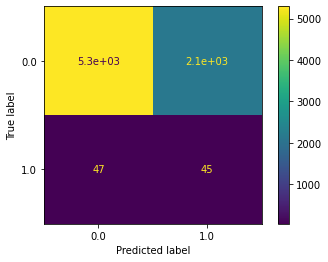

In [ ]:
import joblib
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

randsearch_randomforest = joblib.load("randsearch_randomforest.pkl")
estimator = randsearch_randomforest.best_estimator_

xtest = pd.read_csv('xtest.csv', sep=',')
ytest = pd.read_csv('ytest.csv', sep=',')

print(xtest.shape)
print(ytest.shape)

print('\nTest: balanced_accuracy of tuned Random Forest: ', round(balanced_accuracy_score(ytest, estimator.predict(xtest)), 2))
print('Test: f1_score of tuned Random Forest: ', round(f1_score(ytest, estimator.predict(xtest)), 2))
print('Test: precision of tuned Random Forest: ', round(precision_score(ytest, estimator.predict(xtest)), 2))
print('Test: recall of tuned Random Forest: ', round(recall_score(ytest, estimator.predict(xtest)), 2))

print("\ntuned Random Forest: Confusion Matrix on Test")
plot_confusion_matrix(estimator, xtest,  ytest);

## 1.5 Predict on Test Using Grid Search

(7534, 60)
(7534, 1)

Test: balanced_accuracy of tuned Random Forest:  0.54
Test: f1_score of tuned Random Forest:  0.05
Test: precision of tuned Random Forest:  0.04
Test: recall of tuned Random Forest:  0.12

tuned Random Forest: Confusion Matrix on Test


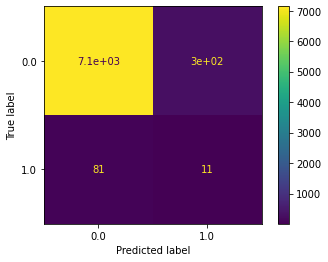

In [ ]:
gridsearch_randomforest = joblib.load("gridsearch_randomforest.pkl")
estimator2 = gridsearch_randomforest.best_estimator_

xtest = pd.read_csv('xtest.csv', sep=',')
ytest = pd.read_csv('ytest.csv', sep=',')

print(xtest.shape)
print(ytest.shape)

print('\nTest: balanced_accuracy of tuned Random Forest: ', round(balanced_accuracy_score(ytest, estimator2.predict(xtest)), 2))
print('Test: f1_score of tuned Random Forest: ', round(f1_score(ytest, estimator2.predict(xtest)), 2))
print('Test: precision of tuned Random Forest: ', round(precision_score(ytest, estimator2.predict(xtest)), 2))
print('Test: recall of tuned Random Forest: ', round(recall_score(ytest, estimator2.predict(xtest)), 2))

print("\ntuned Random Forest: Confusion Matrix on Test")
plot_confusion_matrix(estimator2, xtest,  ytest);